<a href="https://colab.research.google.com/github/swatishinde1234/swati_13/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

In [ ]:
#print first fev data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.size

1000

In [ ]:
df.columns =(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[()$]","",regex=True)
    .str.replace("-","_")
    .str.replace(" ","_")
)

In [ ]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1_100'],
      dtype='object')

In [ ]:
#selecting features

x = df[['annual_income_k','spending_score_1_100']]
x.head()

,annual_income_k,spending_score_1_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


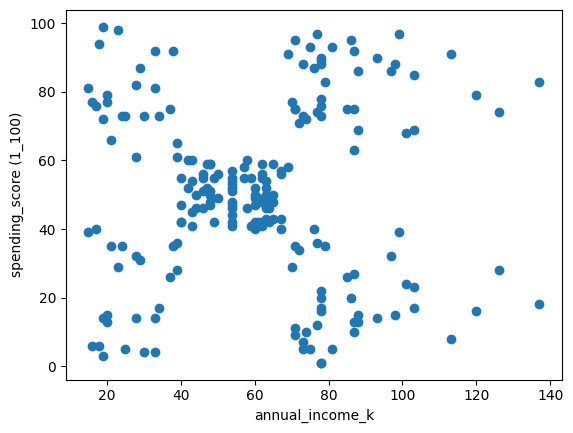

In [ ]:
#visualising raw data

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x['annual_income_k'],x['spending_score_1_100'])
plt.xlabel('annual_income_k')
plt.ylabel('spending_score (1_100)')
plt.show()

#clustring is unsupervised(it is point of group)

In [ ]:
#k means clustering
 # k means tris to group points so that points in the same group are close to each other

# from sklearn.cluster import KMeans as kMeans

# kmeans = kMeans(n_clusters = 5, random_state=42)
# labels = kmeans.fit_predict(x)

# # #n_cluster , divide the customer into 5 group

# # fit(x) - looksat all data points in x, place 5 random centroids

# # #assings each points to center of assigned points in iteration
# # repeats untill SQLTablefor each data point returns which cluster it belong to
# # represents them with numeric values

In [ ]:
# labels[:10]

In [ ]:
# df["clusters"] = labels
# df.head()

In [ ]:
# #visualize cluster_optics_dbscan
# plt.scatter(
#     df['annual_income_k'],
#     df['spending_score_1_100'],
#     c=labels
# )

# plt.xlabel('annual_income_k')
# plt.ylabel('spending_score (1_100)')
# plt.title('customer segments')
# plt.show()

In [ ]:
# elbow method

# it helps to find how many group to use

from sklearn.cluster import KMeans


wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

  # wcss - within cluster sum of squares
  # lower wcss - tightly clusters
  # higher wcss - messy cluster_optics_dbscan
  # we will store this for each kmeans
  #each loop - new model - different number of clusters

  # in each loop k incresess, wcss decresess and improvement
  # slow down after certain points


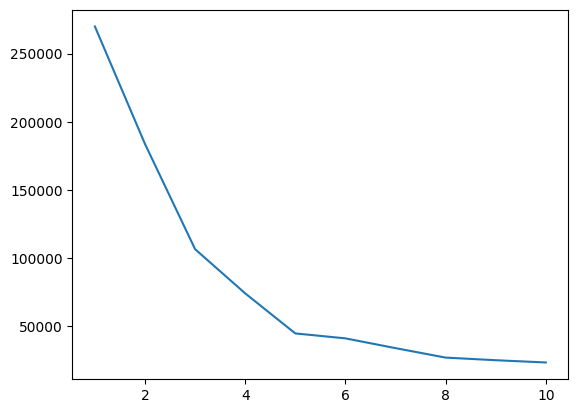

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state=42)
labels = kmeans.fit_predict(x)

In [ ]:
labels[:10]

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3], dtype=int32)

In [ ]:
df["clusters"] = labels
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,clusters
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6


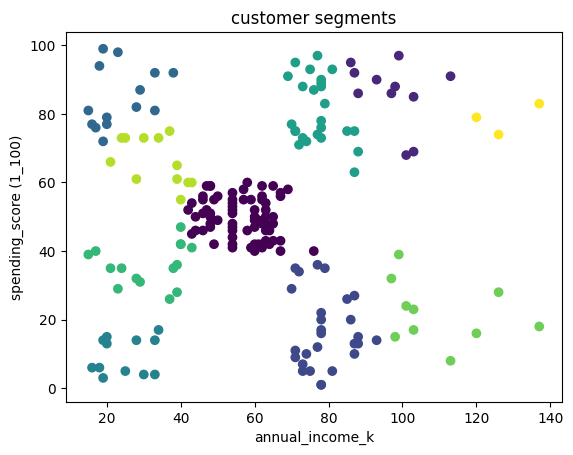

In [ ]:
#visualize cluster_optics_dbscan
plt.scatter(
    df['annual_income_k'],
    df['spending_score_1_100'],
    c=labels
 )

plt.xlabel('annual_income_k')
plt.ylabel('spending_score (1_100)')
plt.title('customer segments')
plt.show()

In [ ]:
# applying PCA here

# principal compound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

#components = 2 - reducing data 2 dimension,
#information preserved mostly

# PCA are used when data has many feature,
# so pca compress information then we visualize it
# pca does not create clusters, it helps us see them

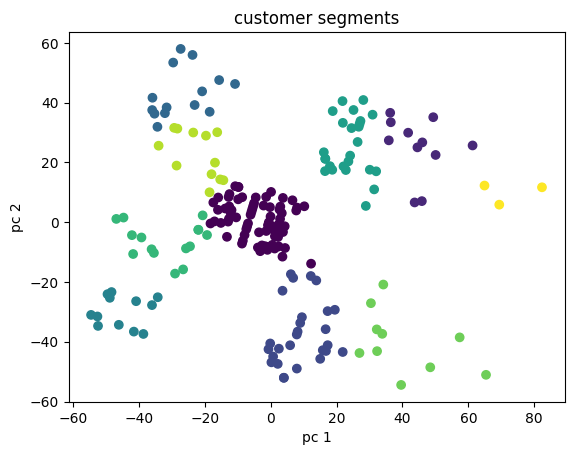

In [ ]:
#visualize cluster using PCA
plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['clusters']
)

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')
plt.show()

In [ ]:
df.groupby('clusters')[['annual_income_k','spending_score_1_100']].mean()

,annual_income_k,spending_score_1_100
clusters,,
0,56.464789,49.774648
1,97.090909,86.090909
2,79.000000,16.592593
3,23.428571,84.785714
4,24.583333,9.583333
5,76.960000,80.800000
6,31.533333,35.866667
7,109.700000,22.000000
8,33.500000,66.250000


In [ ]:
df['segment'] = df['clusters'].map({
    0: 'mid income - mid speed',
    1: 'high income - high speed',
    2: 'low income - high speed',
    3: 'high income - low speed',
    4: 'low income - low speed',
})

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,clusters,cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,4


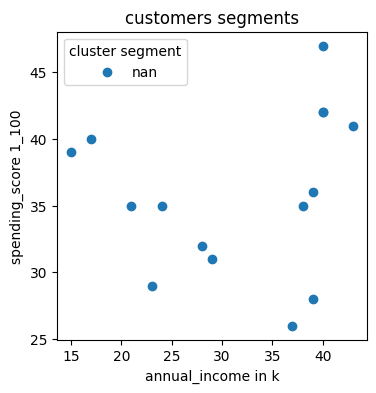

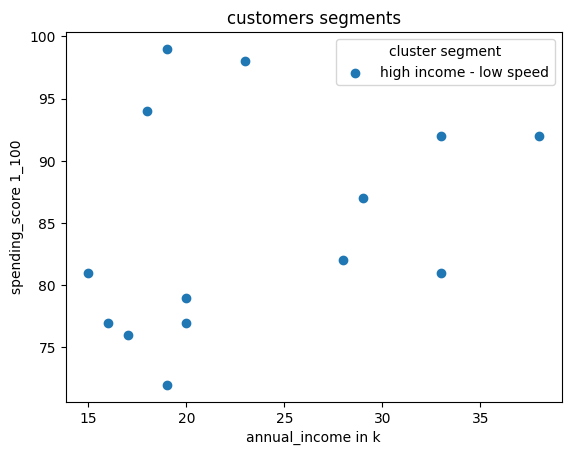

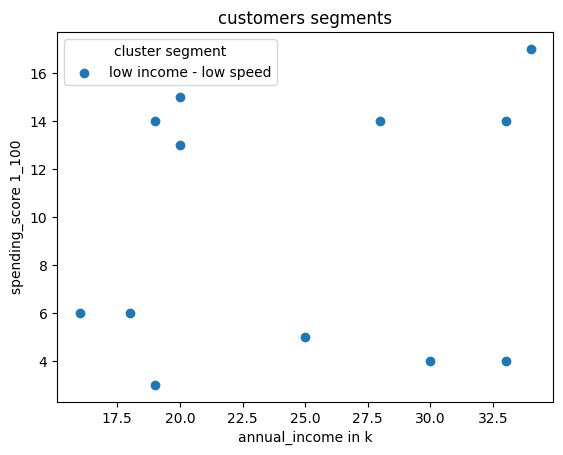

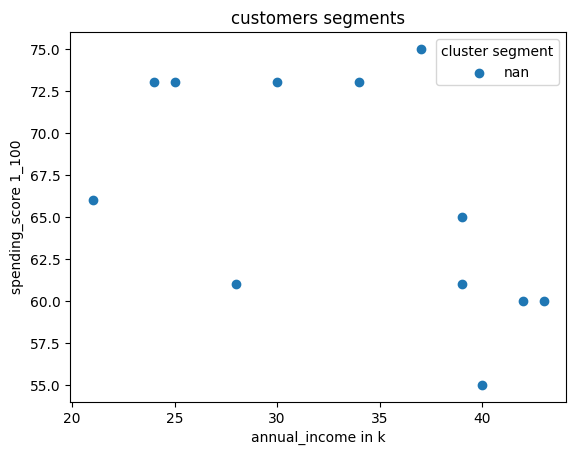

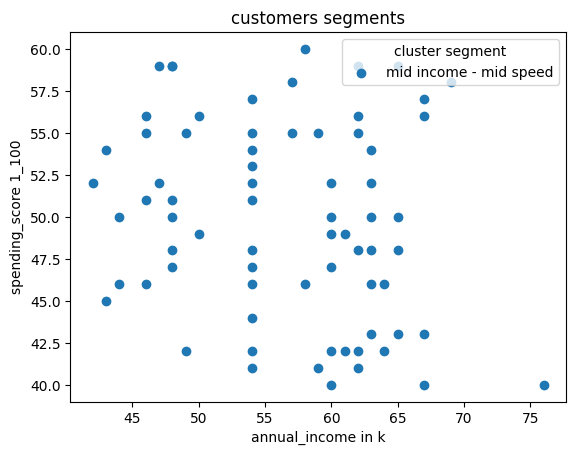

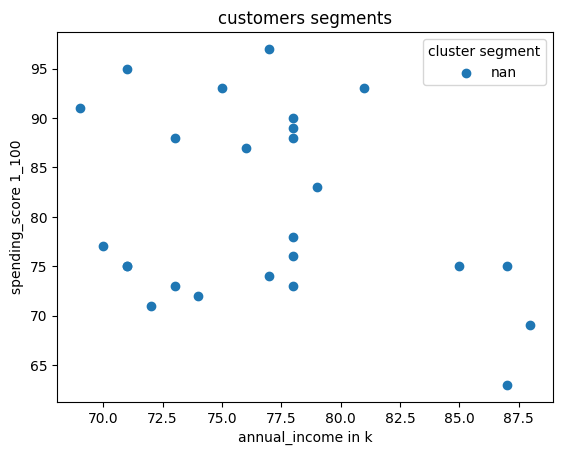

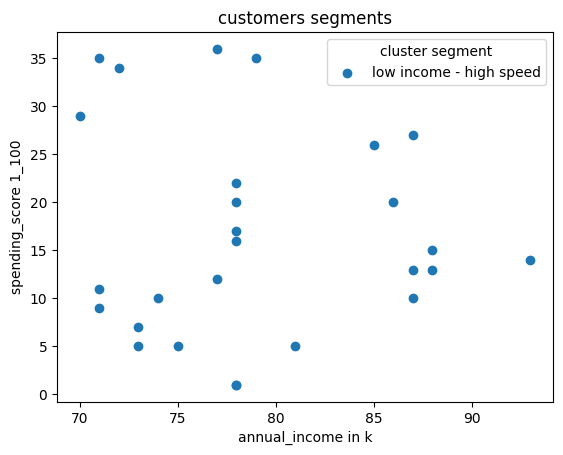

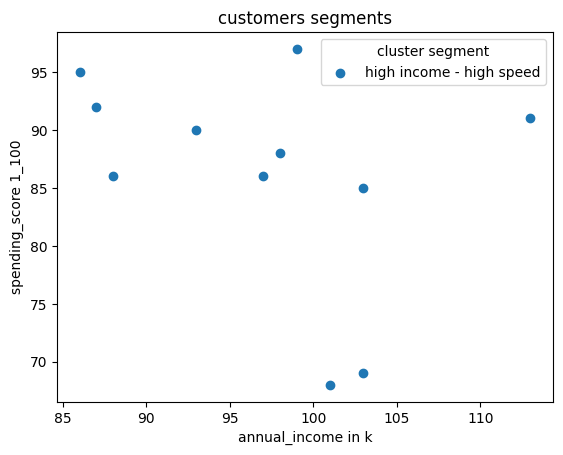

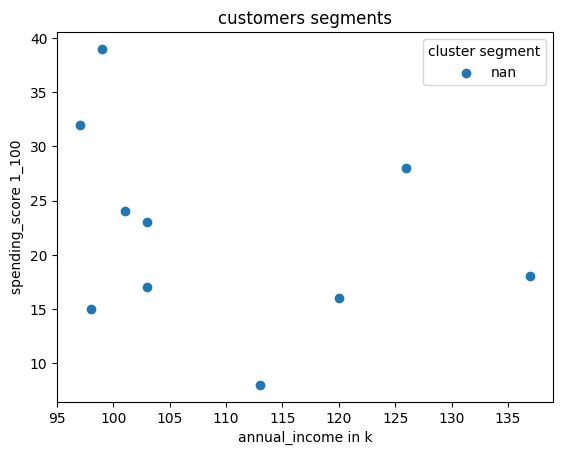

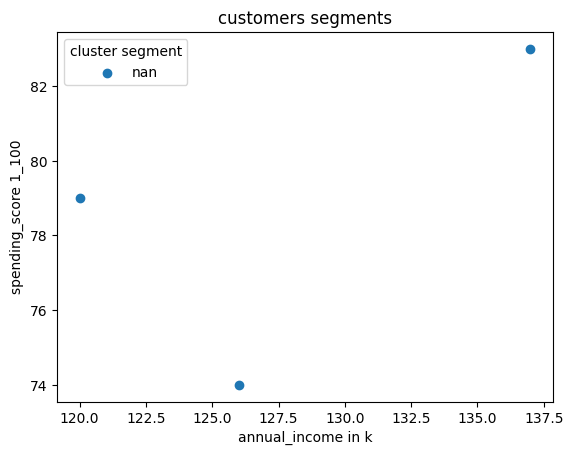

In [ ]:
plt.figure(figsize=(4,4))

for segment_name,clusters_id in df[['segment','clusters']].drop_duplicates().values:
  subset = df[df['clusters'] == clusters_id]

  plt.scatter(
      subset['annual_income_k'],
      subset['spending_score_1_100'],
      label=segment_name
  )

  plt.xlabel('annual_income in k')
  plt.ylabel('spending_score 1_100')
  plt.title('customers segments')
  plt.legend(title='cluster segment')
  plt.show()

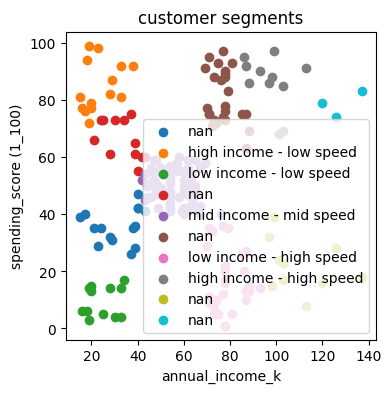

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

# Loop through unique segment-cluster pairs
for segment_name, cluster_id in df[['segment','clusters']].drop_duplicates().values:
    subset = df[df['clusters'] == cluster_id]

    plt.scatter(
        subset['annual_income_k'],
        subset['spending_score_1_100'],
        label=segment_name
    )

plt.xlabel('annual_income_k')
plt.ylabel('spending_score (1_100)')
plt.title('customer segments')
plt.legend()
plt.show()

In [ ]:
# car - red, yellow, orange, 20k 40k 50k

# car - red yellow orange cost
# car    1.   0.     0.     20k
# car    0.  1.     0.     40k
# car    0.  0.     1.     50k

In [ ]:
# more apprroved or rejected?
# bar chart of loan status
 In short: A bar chart of loan status helps you quickly see whether more loans are approved or rejected

# box plot for loan amount
A box plot for loan amount is a statistical chart that shows the distribution of loan values in a compact way.

# which group has higher loan approval
# which feature looks important for loan approval